# Vehicle Recall Data
### Initial Questions
* What Make/Model is being recalled?
    * See Fig 1, Fig 2, and Fig 3
    * Honda, Ford, Blue Bird most common
* What specific problems led to the recall?
    * Most common by far is airbags (Fig 5)
* Is this correlated to an increase in defects or better QA?
* At what mileage did we start seeing the problem?
    * Average Miles at Failure: 68334.08213141191
    * Most failures happen prior to 100k miles, by far
* Did an increase in complaints lead to a recall?
    * Generally, as the number of recalls go up, the number of complaints also go up (Fig 4)

In [1]:
len(rcl_df.index)

NameError: name 'rcl_df' is not defined

In [2]:
import pandas as pd
import re
import codecs
import numpy as py
import matplotlib
import matplotlib.pyplot as plt
import math

data_path = 'data'
fields_path = 'fields'

# Read and parse a file containing column names for a dataset.
# Returns a list of strings (the column names).
def load_column_names(columns_file_name):
    file = open(columns_file_name)
    column_names = []
    readingFields = False
    for line in file:
        if readingFields:
            if re.match('^[0-9]', line):
                split_line = line.split()
                column_names.append(split_line[1])
        elif line.startswith('Field#'):
            readingFields = True
    file.close()
    return column_names
#}

def rounddown_year(x):
    return int(math.floor(x / 10000.0))

# Load a dataest by its abbreviated names (ex: RCL).
def load_data_file(name, encoding):
    
    # Read the column names from a separate file.
    fields_file_name = fields_path + '/' + name + '.txt';
    names = load_column_names(fields_file_name)
    
    # Read the data from a CSV file.
    data_file_name = 'FLAT_' + name + '.txt';
    df = pd.read_csv(data_path + '/' + data_file_name,
                     delimiter='\t', header=None, encoding=encoding, names=names)
    
    return df
#}

In [3]:
rcl_df = load_data_file('RCL', encoding='latin1')
rcl_df

/Users/matt/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,MFGTXT,RCDATE,DATEA,RPNO,FMVSS,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID
0,1,02V288000,FORD,FOCUS,2001,02S41,ELECTRICAL SYSTEM:BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,Ford Motor Company,20021106.0,20021106,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215022000000202
1,2,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,Ford Motor Company,20021106.0,20021106,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215021000000202
2,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,NaN,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730.0,20020813.0,...,"Jayco, Inc.",20020904.0,20020912,NaN,NaN,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL C...","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COU...",OWNERS WILL BE MAILED CORRECT LABELS FOR INSTA...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015210000106403000000349
3,4,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2003,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106325000000272
4,5,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2002,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106324000000272
5,6,02V237000,HOLIDAY RAMBLER,ADMIRAL,1999,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106323000000272
6,7,02V237000,MONACO COACH,MONARCH SE,2003,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106322000000272
7,8,02V237000,MONACO COACH,MONARCH SE,2002,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106321000000272
8,9,02V237000,MONACO COACH,LAPALMA,1999,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106320000000272
9,10,02V237000,MONACO COACH,LAPALMA,2003,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000105496000000272


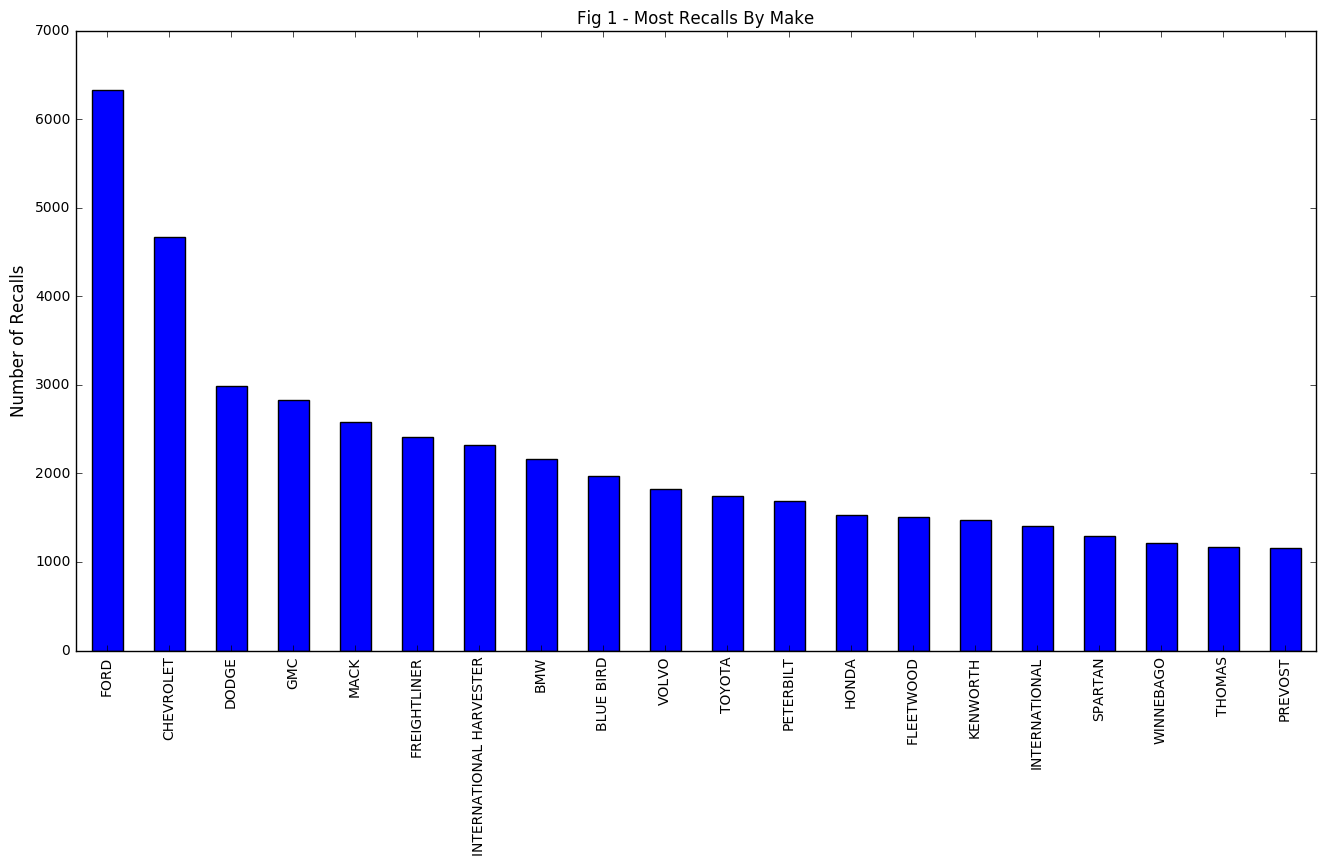

In [4]:
# Make Counts
plt.figure(figsize=(16,8))
rcl_df['MAKETXT'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Fig 1 - Most Recalls By Make")
plt.ylabel('Number of Recalls', fontsize=12)
plt.gcf()

In [91]:
gp_df = rcl_df[['MAKETXT','MODELTXT']].groupby('MAKETXT').count()
vc = rcl_df['MAKETXT'].value_counts()
pd.concat([gp_df, vc])

FORD                         6325
CHEVROLET                    4665
DODGE                        2992
GMC                          2827
MACK                         2580
FREIGHTLINER                 2416
INTERNATIONAL HARVESTER      2323
BMW                          2165
BLUE BIRD                    1966
VOLVO                        1827
TOYOTA                       1742
PETERBILT                    1687
HONDA                        1532
FLEETWOOD                    1512
KENWORTH                     1474
INTERNATIONAL                1403
SPARTAN                      1298
WINNEBAGO                    1211
THOMAS                       1165
PREVOST                      1157
NISSAN                       1085
PONTIAC                      1046
JEEP                         1040
THOMAS BUILT BUSES           1021
PIERCE                       1009
GULF STREAM                  1008
NEWMAR                        981
MERCEDES BENZ                 981
VOLKSWAGEN                    947
HARLEY-DAVIDSO

In [39]:
rcl_df.groupby(['MAKETXT','MODELTXT'])

RECORD_ID  CAMPNO  \
MAKETXT                  MODELTXT                                         
109S MEDALIST TRAIL A/P  P255/70R16                           1       1   
109S PHANTOM AP          P255/70R16                           1       1   
112S UNIROYAL LAREDO A/S P265/75R15SL                         1       1   
114S UNIROYAL LAREDO AWP P265/75R16                           1       1   
3M                       SERIES 963                           1       1   
4-STAR                   HAYRACK                              1       1   
                         HORSE TRAILER                        8       8   
4-STAR TRAILERS          4-HORSE BUMPER PULL                  1       1   
                         4-HORSE L.Q.                         1       1   
                         HORSE TRAILER                        8       8   
                         POLO TRAILER                         1       1   
4MOMS                    SELF INSTALLING CAR SEAT             1       1   
6504510106               6504510106                           1       1   
A&M                      ELECTRIC DOOR ACTUATOR               1       1   
AAC                      MECHANICAL FUEL PUMP                 1       1   
AAI MOTORSPORTS          COMBINATION LAMPS                    1       1   
AASV                     SPIRIT OF MOBILITY                   2       2   
ABADDON PRODUCTS         HELMET                               1       1   
ABC                      ACRON MAGNUM                         5       5   
                         ALICON                               2       2   
                         ALIZEE                               4       4   
                         AU138                                1       1   
AC DELCO                 45A0871                              1       1   
                         45A3073                              1       1   
ACC                      8909                                 1       1   
                         EXT-001                              2       2   
                         EXT-002                              3       3   
                         EXT-003                              2       2   
                         EXT-004                              1       1   
ACCC                     AMERICAN PLATINUM (H-RATED)          1       1   
...                                                         ...     ...   
ZENITH                   JR7815                               1       1   
                         LR7815                               1       1   
ZERO                     DS                                   6       6   
                         FX                                   6       6   
                         S                                    6       6   
                         SR                                   4       4   
                         XU                                   3       3   
                         ZERO DS                              8       8   
                         ZERO MXD                             1       1   
                         ZERO S                               8       8   
                         ZERO X                               2       2   
                         ZERO XD                              1       1   
                         ZERO XU                              3       3   
                         ZERO XU-LSM                          1       1   
ZF                       CLUTCH KIT                           1       1   
                         CONTROL ARM                          1       1   
                         I-SHAFT                              1       1   
                         REAR AXLE/HUB CARRIER                1       1   
ZF ELECTRONIC SYSTEMS    SENSOR CLUSTER                       1       1   
ZF GROUP                 9-SPEED AUTOMATIC                    1       1   
                         RL 77 AXLE SYSTEM                    1       1   
    

/Users/matt/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


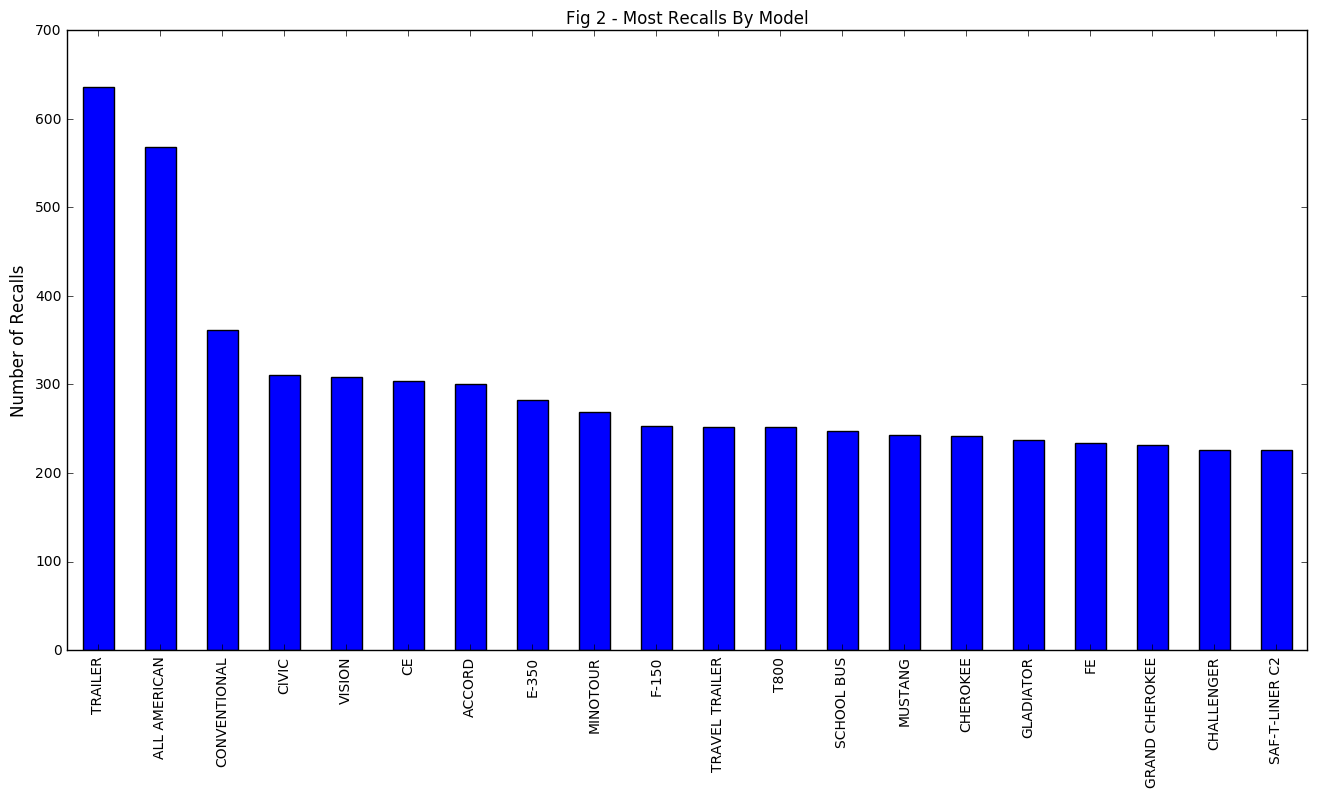

In [69]:
# Model Counts
plt.figure(figsize=(16,8))
df['MODELTXT'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Fig 2 - Most Recalls By Model")
plt.ylabel('Number of Recalls', fontsize=12)
plt.gcf()

/Users/matt/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


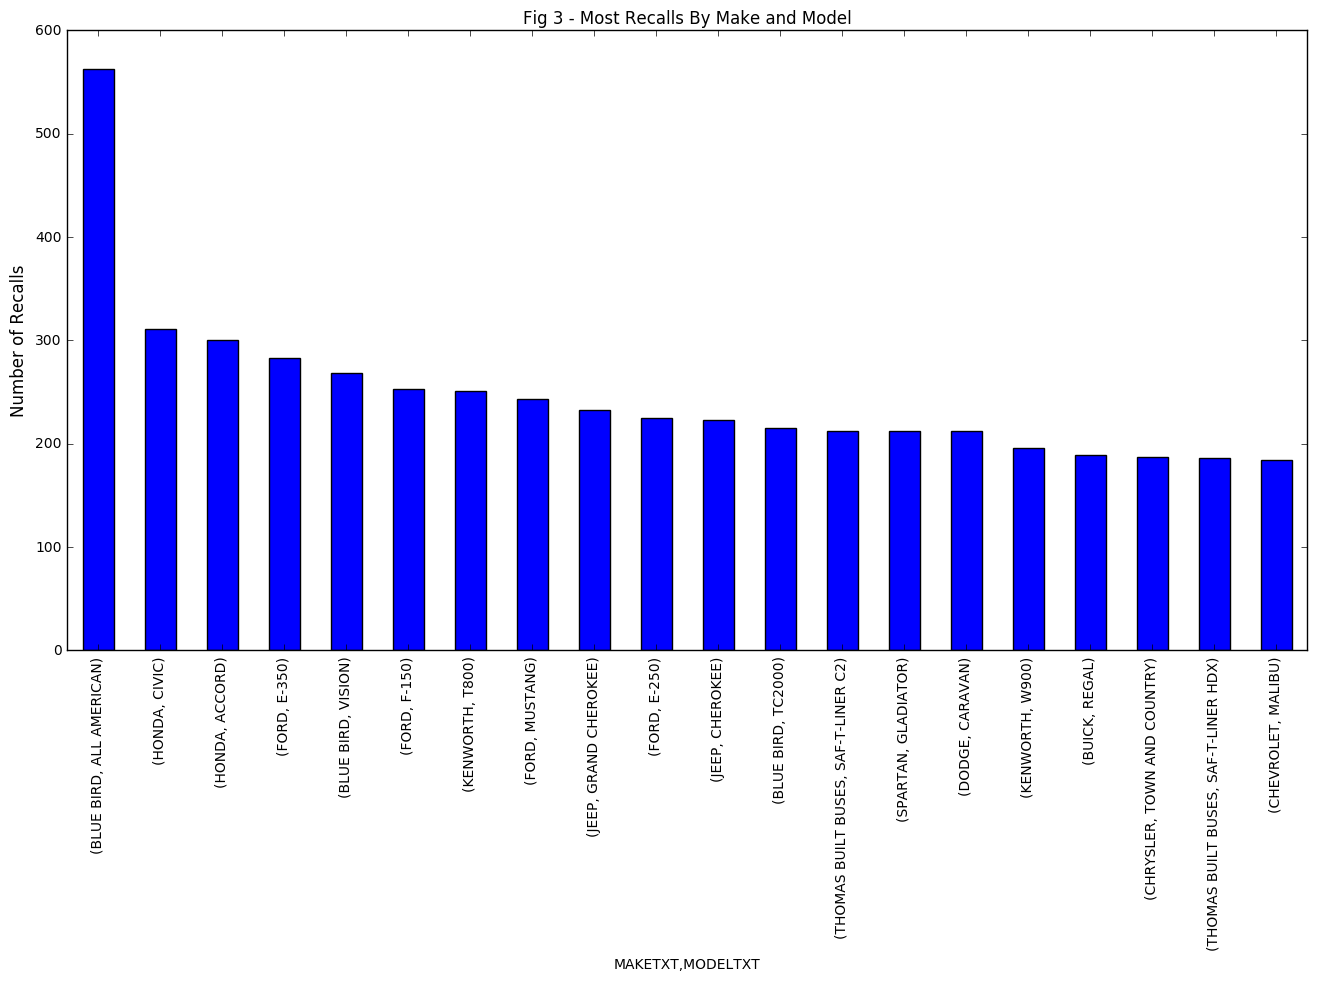

In [68]:
# Model Counts
plt.figure(figsize=(16,8))
rcl_df.groupby(['MAKETXT','MODELTXT']).size().sort_values(ascending=False).nlargest(20).plot(kind='bar')
plt.title("Fig 3 - Most Recalls By Make and Model")
plt.ylabel('Number of Recalls', fontsize=12)
plt.gcf()

In [27]:
cmpl_df = load_data_file('CMPL', encoding='iso-8859-1')

/Users/matt/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (15,22,26,32,33,34,35,36,38,39,40,41,42,43,44,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


/Users/matt/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


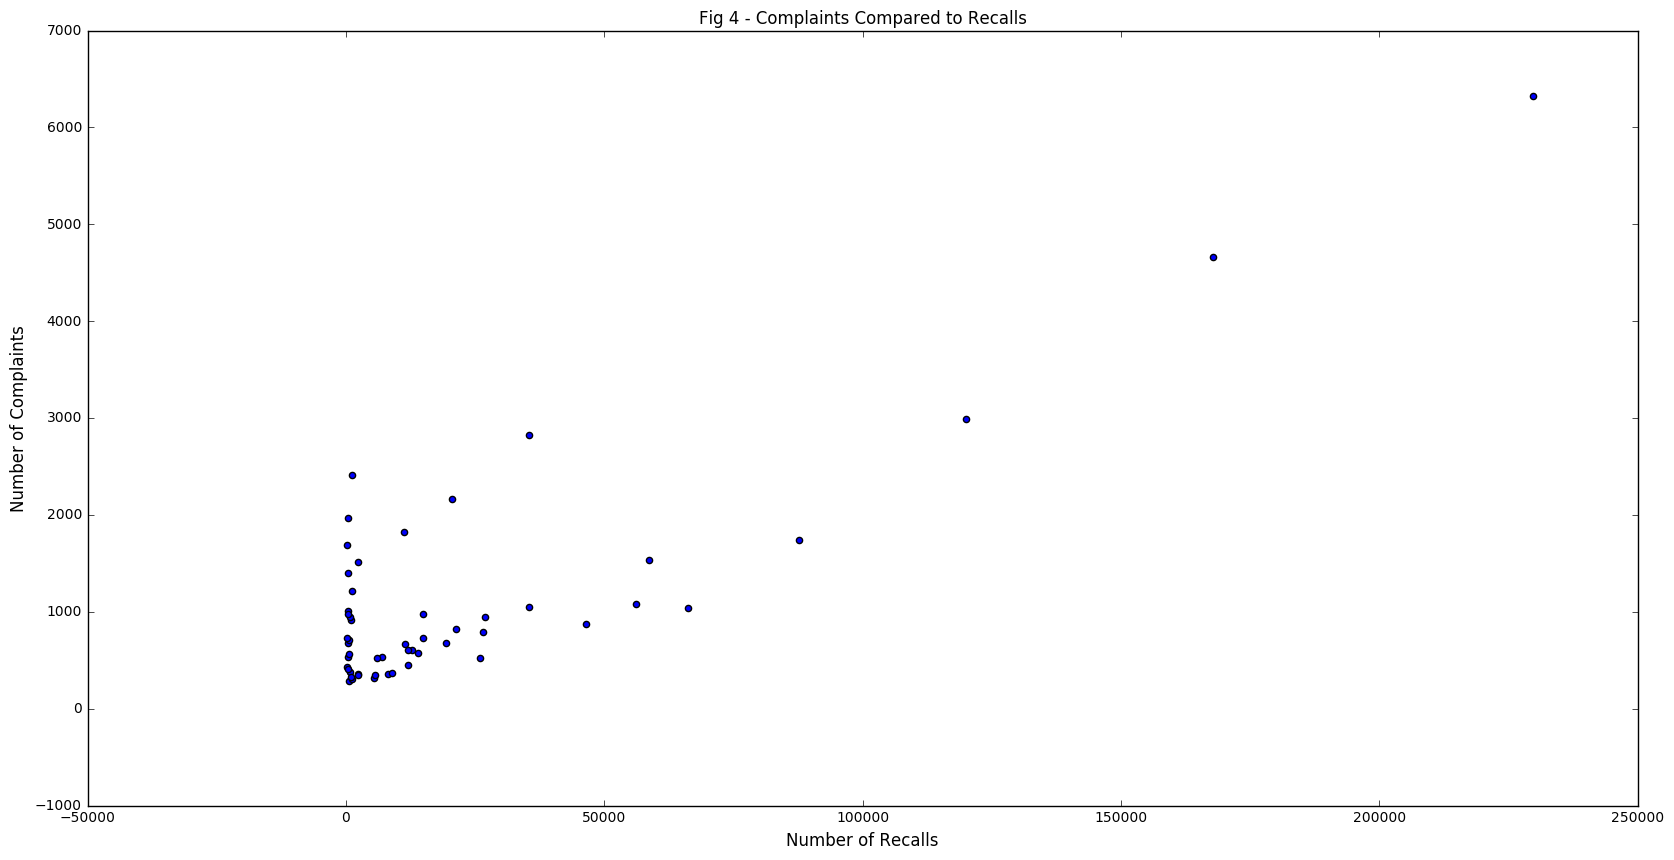

In [70]:
rcnt = rcl_df['MAKETXT'].value_counts().nlargest(100)
ccnt = cmpl_df['MAKETXT'].value_counts().nlargest(100)
cat = pd.concat([rcnt,ccnt],axis=1)
cat.columns = ['1','2']

plt.figure(figsize=(16,8))
cat.plot.scatter(x ='2',y='1')
plt.title("Fig 4 - Complaints Compared to Recalls")
plt.ylabel('Number of Complaints', fontsize=12)
plt.xlabel('Number of Recalls', fontsize=12)
plt.gcf()

In [93]:
inv_df = load_data_file('INV', encoding='iso-8859-1')
inv_df

,NHTSA,MAKE,MODEL,YEAR,COMPNAME,MFR_NAME,ODATE,CDATE,CAMPNO,SUBJECT,SUMMARY
0,C85007,BUICK,CENTURY,1982.0,"SERVICE BRAKES, HYDRAULIC",General Motors LLC,19850619.0,19890518.0,66V178000,REAR BRAKE LOCKUP,There is no summary currently available
1,C85007,BUICK,CENTURY,1984.0,"SERVICE BRAKES, HYDRAULIC",General Motors LLC,19850619.0,19890518.0,66V178000,REAR BRAKE LOCKUP,There is no summary currently available
2,C85007,CHEVROLET,CELEBRITY,1982.0,"SERVICE BRAKES, HYDRAULIC",General Motors LLC,19850619.0,19890518.0,66V178000,REAR BRAKE LOCKUP,There is no summary currently available
3,C85007,PONTIAC,6000,1985.0,"SERVICE BRAKES, HYDRAULIC",General Motors LLC,19850619.0,19890518.0,66V003000,REAR BRAKE LOCKUP,There is no summary currently available
4,C85007,PONTIAC,6000,1985.0,"SERVICE BRAKES, HYDRAULIC",General Motors LLC,19850619.0,19890518.0,66V178000,REAR BRAKE LOCKUP,There is no summary currently available
5,C86001,AUDI,5000,1980.0,VEHICLE SPEED CONTROL:LINKAGES,"Volkswagen Group of America, Inc.",19860805.0,19890711.0,NaN,SUDDEN ACCELERATION,There is no summary currently available
6,C87002,ARROWCRAFT,ARROWCRAFT,1978.0,SUSPENSION,ARROWCRAFT PRODUCTS,19870427.0,19910830.0,NaN,REAR AXLE FRACTURE,There is no summary currently available
7,C87003,FORD,E350,1984.0,VEHICLE SPEED CONTROL:LINKAGES,Ford Motor Company,19870429.0,19870901.0,NaN,FILLER NECK SPURT,There is no summary currently available
8,C88001,CHRYSLER,LASER,1985.0,SEATS,Chrysler (FCA US LLC),19880518.0,19891030.0,NaN,SEAT ATTACHMENT FAILURE,There is no summary currently available
9,C88001,CHRYSLER,LEBARON,1986.0,SEATS,Chrysler (FCA US LLC),19880518.0,19891030.0,NaN,SEAT ATTACHMENT FAILURE,There is no summary currently available


/Users/matt/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


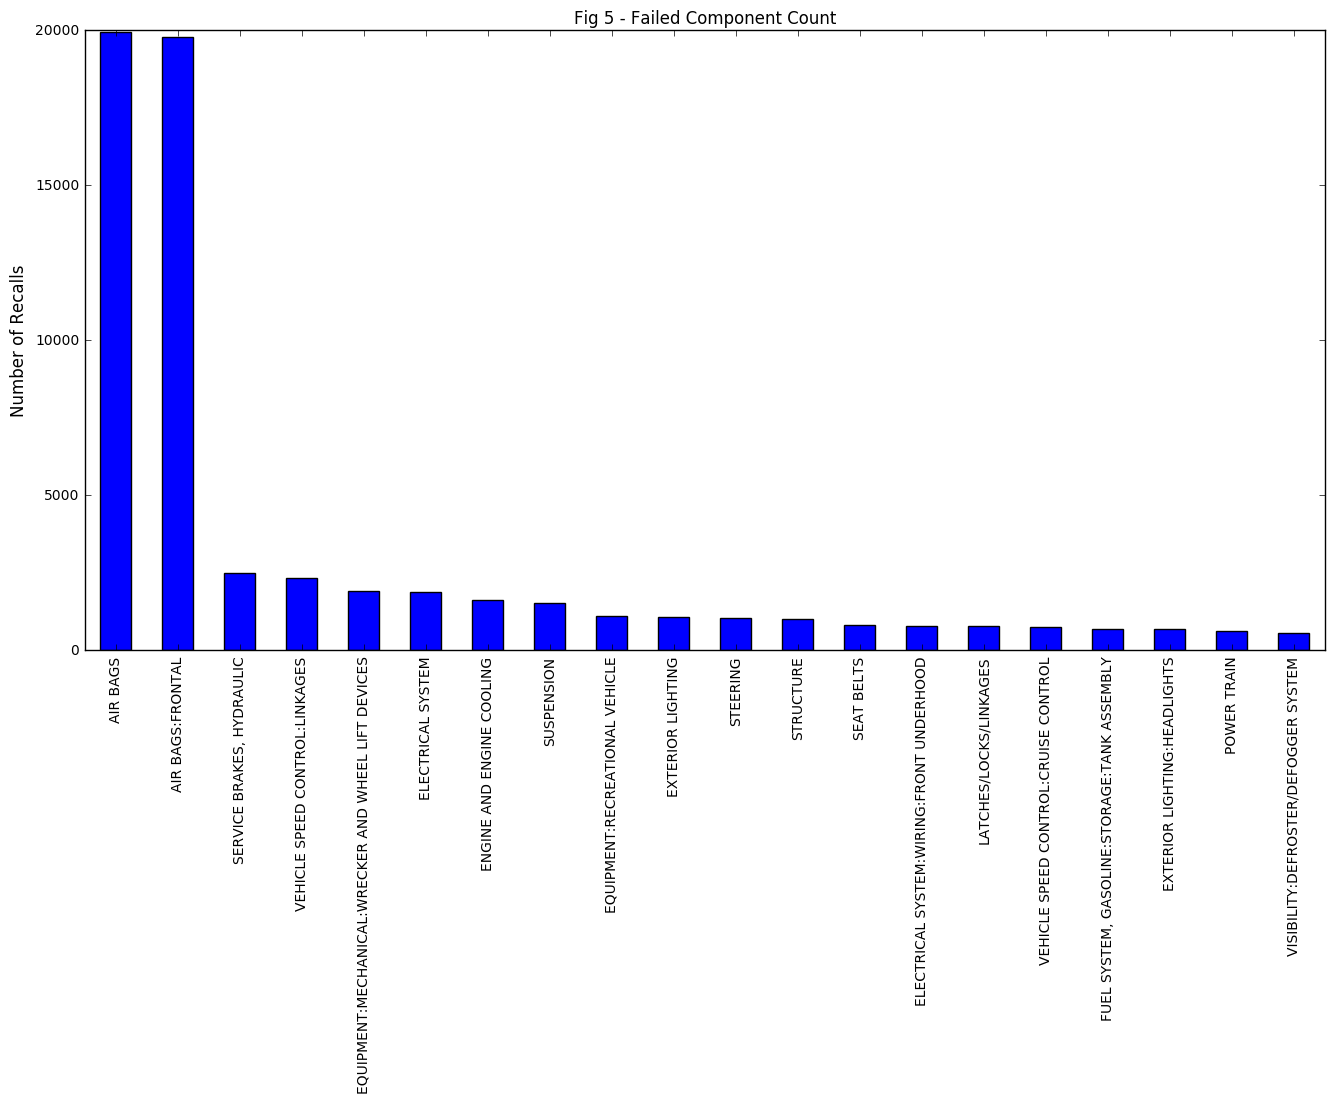

In [87]:
plt.figure(figsize=(16,8))
inv_df['COMPNAME'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Fig 5 - Failed Component Count")
plt.ylabel('Number of Recalls', fontsize=12)
plt.gcf()

In [34]:
plt.figure(figsize=(16,8))
numBins = 10
bins = py.linspace(0, 500000, numBins)

cmpl_df['MILES'] = cmpl_df['MILES'].fillna(cmpl_df['MILES'].mean())
cmpl_df['MILES']

bin_df = pd.cut(cmpl_df['MILES'],bins)
bin_df.value_counts().hist(bins=numBins)
plt.title("Fig 5 - Failed Component Count")
plt.ylabel('Number of Recalls', fontsize=12)
plt.gcf()

NameError: name 'cmpl_df' is not defined

/Users/matt/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


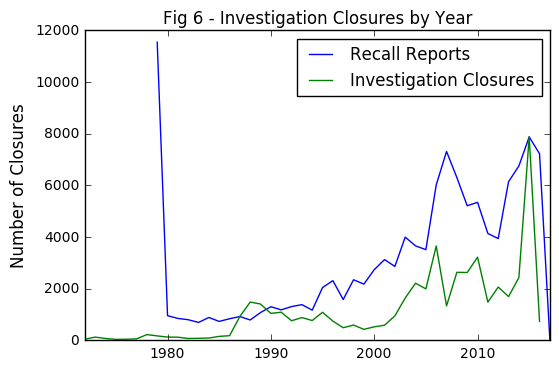

In [96]:
rcl_cleaned_df = rcl_df['DATEA'].dropna()
rcl_rounded_df = rcl_cleaned_df.apply(rounddown_year)
rcl_counts = rcl_rounded_df.value_counts()

inv_cleaned_df = inv_df['CDATE'].dropna()
inv_rounded_df = inv_cleaned_df.apply(rounddown_year)
inv_counts = inv_rounded_df.value_counts()

comb = pd.concat([rcl_counts,inv_counts],axis=1)
comb.columns = ['Recall Reports','Investigation Closures']

plt.figure(figsize=(20,10))
comb.sort_index().plot(kind='line')
plt.title("Fig 6 - Investigation Closures by Year")
plt.ylabel('Number of Closures', fontsize=12)
plt.gcf()

In [91]:
tsbs_df = load_data_file('TSBS', encoding='iso-8859-1')
tsbs_df

(499038, 10)

In [81]:
cmpl_gp = cmpl_df[['MAKETXT','MODELTXT','YEARTXT','CMPLID']].groupby(['MAKETXT','MODELTXT','YEARTXT'])['CMPLID'].count().nlargest(100).to_frame()
cmpl_gp['RECALLED'] = False

In [82]:
for index, row in cmpl_gp.iterrows():
        row['RECALLED'] = ((rcl_df['MAKETXT'] == index[0]) & (rcl_df['MODELTXT'] == index[1]) & (rcl_df['YEARTXT'] == index[2])).any()
        cmpl_gp.loc[index] = row

In [83]:
cmpl_gp

CMPLID RECALLED
MAKETXT   MODELTXT         YEARTXT                 
UNKNOWN   UNKNOWN          9999.0     9062    False
FIRESTONE FIRESTONE        9999.0     5210     True
FORD      FOCUS            2000.0     5124     True
          WINDSTAR         1995.0     4918     True
          FUSION           2010.0     4252     True
          EXPLORER         2002.0     3968     True
          F-150            1997.0     3285     True
DODGE     DURANGO          1999.0     3126     True
TOYOTA    CAMRY            2007.0     2915     True
CHEVROLET COBALT           2006.0     2699     True
TOYOTA    PRIUS            2010.0     2558     True
CHRYSLER  TOWN AND COUNTRY 2008.0     2499     True
FORD      FOCUS            2012.0     2440     True
JEEP      GRAND CHEROKEE   2005.0     2431     True
FORD      ESCAPE           2010.0     2383     True
TOYOTA    SIENNA           2004.0     2378     True
FORD      EXPLORER         1998.0     2356     True
HYUNDAI   SONATA           2011.0     2310     True
FORD      FOCUS            2001.0     2304     True
JEEP      GRAND CHEROKEE   1999.0     2287     True
FORD      TAURUS           1993.0     2257     True
          F-150            2004.0     2247     True
JEEP      LIBERTY          2002.0     2221     True
DODGE     CARAVAN          1996.0     2187     True
FORD      WINDSTAR         2001.0     2175     True
          EXPLORER         1997.0     2149     True
HONDA     ACCORD           2003.0     2145     True
FORD      WINDSTAR         2000.0     2124     True
CHEVROLET SILVERADO        1999.0     2116     True
PONTIAC   G6               2006.0     2106     True
...                                    ...      ...
JEEP      CHEROKEE         2014.0     1518     True
FORD      ESCAPE           2008.0     1515     True
DODGE     CHARGER          2006.0     1507     True
CHEVROLET TRAILBLAZER      2002.0     1506     True
TOYOTA    PRIUS            2006.0     1502     True
CHEVROLET MALIBU           2004.0     1486     True
UNKNOWN   UNKNOWN1         9999.0     1486    False
JEEP      GRAND CHEROKEE   2006.0     1484     True
FORD      TAURUS           2000.0     1479     True
CHEVROLET MALIBU           1998.0     1476     True
DODGE     NEON             1995.0     1472     True
TOYOTA    PRIUS            2008.0     1471     True
NISSAN    PATHFINDER       2005.0     1468     True
FORD      FREESTAR         2004.0     1461     True
          TAURUS           2003.0     1461     True
DODGE     RAM 1500         2005.0     1446     True
SATURN    ION              2006.0     1443     True
PONTIAC   G6               2007.0     1427     True
DODGE     DURANGO          2000.0     1424     True
CHRYSLER  TOWN AND COUNTRY 1996.0     1411     True
JEEP      GRAND CHEROKEE   1997.0     1410     True
HONDA     CIVIC            2006.0     1404     True
JEEP      GRAND CHEROKEE   2011.0     1395     True
FORD      EDGE             2013.0     1394     True
JEEP      GRAND CHEROKEE   2004.0     1390     True
FORD      ESCAPE           2009.0     1385     True
          F-150            2011.0     1358     True
HONDA     ACCORD           1998.0     1357     True
FORD      F-150            2001.0     1352     True
HONDA     ACCORD           2000.0     1349     True

[100 rows x 2 columns]